In [23]:
!pip install tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, ImageDataGenerator 
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [4]:
IMAGE_SIZE = [224 , 224]

train_data = "Datasets/Train"
test_data = "Datasets/Test"

In [5]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)

94773248/94765736 [==============================] - 16s 0us/step


In [6]:
resnet.summary()

n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0] 

In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob("Datasets/train/*")

In [10]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [11]:
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation = "softmax")(x)
model = Model(inputs = resnet.input, outputs = prediction)

In [13]:
model.summary()

0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [14]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True 
    )

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [17]:
training_set = train_datagen.flow_from_directory(
    "Datasets/train",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
    )

Found 64 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory(
    "Datasets/test",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
    )

Found 58 images belonging to 3 classes.


In [20]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set) 
)

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/50
2/2 [==============================] - 29s 15s/step - loss: 6.2642 - accuracy: 0.2917 - val_loss: 4.2625 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 18s 13s/step - loss: 4.5357 - accuracy: 0.3750 - val_loss: 10.9252 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 18s 13s/step - loss: 6.9828 - accuracy: 0.4062 - val_loss: 13.1954 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 16s 11s/step - loss: 7.6699 - accuracy: 0.4792 - val_loss: 9.9535 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 15s 10s/step - loss: 5.0892 - accuracy: 0.4792 - val_loss: 3.5675 - val_accuracy: 0

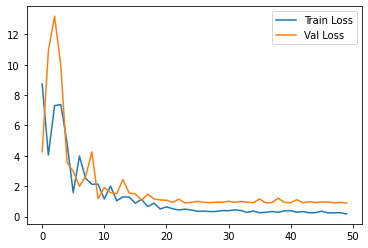

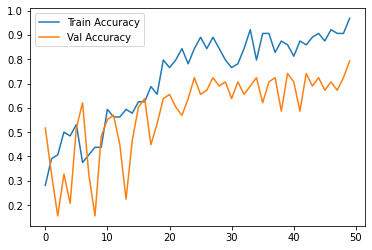

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history["loss"], label = "Train Loss")
plt.plot(r.history["val_loss"], label = "Val Loss")
plt.legend()
plt.show()
plt.savefig("LossVal_Loss")


plt.plot(r.history["accuracy"], label = "Train Accuracy")
plt.plot(r.history["val_accuracy"], label = "Val Accuracy")
plt.legend()
plt.show()
plt.savefig("AccVal_Acc")

In [25]:
model.save("model_resnet50.h5")

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[9.51841295e-01, 3.85764912e-02, 9.58220381e-03],
       [8.95468742e-02, 2.26969831e-02, 8.87756109e-01],
       [4.52765776e-03, 9.89304900e-01, 6.16752869e-03],
       [2.74490137e-02, 7.31429577e-01, 2.41121411e-01],
       [1.57368020e-03, 8.37987304e-01, 1.60439044e-01],
       [5.43303601e-02, 4.25216943e-01, 5.20452738e-01],
       [1.72649743e-05, 1.47276223e-04, 9.99835491e-01],
       [1.65985688e-03, 9.95857179e-01, 2.48291600e-03],
       [6.75146282e-02, 6.91487074e-01, 2.40998313e-01],
       [1.23782419e-02, 9.48011220e-01, 3.96105610e-02],
       [8.26936290e-02, 3.54883783e-02, 8.81818056e-01],
       [7.38412663e-02, 2.14371428e-01, 7.11787343e-01],
       [1.31310485e-02, 9.86650109e-01, 2.18713612e-04],
       [9.88280494e-03, 7.83723950e-01, 2.06393242e-01],
       [9.79786277e-01, 1.63243208e-02, 3.88940796e-03],
       [1.52993530e-01, 3.49221639e-02, 8.12084258e-01],
       [6.00923337e-02, 8.01216602e-01, 1.38691112e-01],
       [8.79498944e-03, 7.66808

In [28]:
y_pred = np.argmax(y_pred , axis = 1)

In [29]:
y_pred

array([0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

In [30]:
model = load_model("model_resnet50.h5")

In [32]:
img = image.load_img("Datasets/Test/lamborghini/10.jpg", target_size = (224, 224))

In [35]:
x = image.img_to_array(img)

In [36]:
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [37]:
x.shape

(224, 224, 3)

In [38]:
x = x/255

In [39]:
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [40]:
x = np.expand_dims(x , axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[0.04903779, 0.580011  , 0.37095115]], dtype=float32)

In [42]:
a = np.argmax(model.predict(img_data), axis = 1)
a

array([1], dtype=int64)